# Aim: Descriptive stats on the preprocessed dataset

# Setup

In [20]:
import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns

import lib_dataimport
import lib_processing
import importlib
lib_dataimport = importlib.reload(lib_dataimport)
lib_processing = importlib.reload(lib_processing)

In [21]:
df = lib_dataimport.read_data()
words, word_frequencies = lib_processing.bag_of_words(df)

# Number of letters

Goethe      521
Schiller    442
Name: Author, dtype: int64


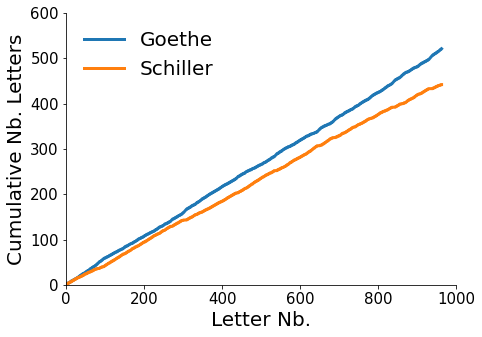

In [106]:
# Sum of letters written by G. and S. respectively:
print(df.Author.value_counts())

# Calculate cumulative numbers of letters written by G. and S. over time
df["cum_counts_G"] = np.cumsum([1 if author == "Goethe" else 0 for author in df.Author])
df["cum_counts_S"] = np.cumsum([1 if author == "Schiller" else 0 for author in df.Author])

# Generate plot and make visually more pleasing
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.set_xlabel("Letter Nb.", size=20)
ax.set_ylabel("Cumulative Nb. Letters", size=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.plot(df.cum_counts_G, lw=3, label="Goethe")
ax.plot(df.cum_counts_S, lw=3, label="Schiller")
ax.set_xlim((0,1000))
ax.set_ylim((0,600))
ax.legend(loc=2, frameon=False, fontsize=20)

# Length of Letters

Author
Goethe      1544.988484
Schiller    2026.092760
Name: length, dtype: float64


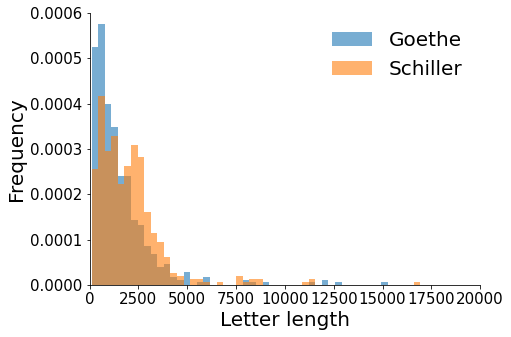

In [105]:
# Calculate length of every letter
df["length"] = [len(l) for l in df.Content]
print(df.groupby("Author").mean().length)

# Plot distribution of letter lenghts
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.set_xlabel("Letter length", size=20)
ax.set_ylabel("Frequency", size=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlim((0,20000))
ax.set_ylim((0,0.0006))
ax.hist([df[df.Author=="Schiller"].length, df[df.Author=="Goethe"].length],
        bins=50, histtype="stepfilled", density=True, alpha=.6, label=["Schiller", "Goethe"],\
        linewidth=3, color=["C1", "C0"]);
ax.legend(loc=1, frameon=False, fontsize=20)

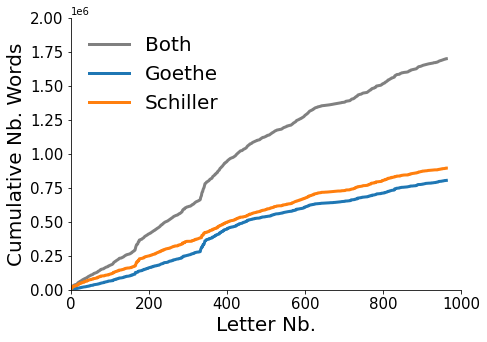

In [80]:
# Cumulative number of words over time per author and in sum
df["cum_words"] = np.cumsum(df.length)
df["cum_words_G"] = np.cumsum([length if author == "Goethe" else 0 for (length, author) in zip(df.length, df.Author)])
df["cum_words_S"] = np.cumsum([length if author == "Schiller" else 0 for (length, author) in zip(df.length, df.Author)])

# Plot
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.set_xlabel("Letter Nb.", size=20)
ax.set_ylabel("Cumulative Nb. Words", size=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlim((0,1000))
ax.set_ylim((0,2e6))
ax.plot(df.cum_words, c="grey", label="Both", lw=3)
ax.plot(df.cum_words_G, label="Goethe", lw=3)
ax.plot(df.cum_words_S, label="Schiller", lw=3)
ax.legend(loc=2, frameon=False, fontsize=20)
